# Dict and Graph Search

In this reading, we'll do two things:

1. see how we could implement a class that works the same as dict (maps keys to values)
2. see how we can search more general graphs (that may have cycles)

In [1]:
from graphviz import Graph, Digraph

## Review

Carefully read the following code.  It's similar to the last reading, except that `add` and `contains` have been turned into methods in `Node` (instead of just functions).

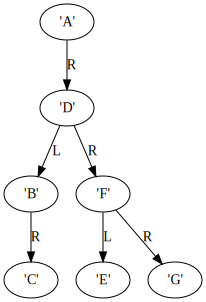

In [2]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
    
    def to_graphviz(self, g=None):
        if g == None:
            g = Digraph()
            
        # draw self
        g.node(repr(self.val))
    
        for label, child in [("L", self.left), ("R", self.right)]:
            if child != None:
                # draw child, recursively
                child.to_graphviz(g)
                
                # draw edge from self to child
                g.edge(repr(self.val), repr(child.val), label=label)
        return g
    
    def _repr_svg_(self):
        return self.to_graphviz()._repr_svg_()
    
    def add(self, val):
        if self.val == val:
            return
        elif val < self.val:
            if self.left != None:
                self.left.add(val)
            else:
                self.left = Node(val)
        else:
            if self.right != None:
                self.right.add(val)
            else:
                self.right = Node(val)

    def contains(self, target):
        if target < self.val and self.left != None:
            return self.left.contains(target)
        elif target > self.val and self.right != None:
            return self.right.contains(target)
        return self.val == target
                
tree = Node("A")
tree.add("D")
tree.add("B")
tree.add("F")
tree.add("E")
tree.add("C")
tree.add("G")
tree

In [3]:
tree.contains("G"), tree.contains("Z")

(True, False)

## Part 1: BST-based Dictionary

The above BST (binary search tree) is basically acting like a set.  We can add values and efficiently check whether certain values have already been added.

What if we want to make it act like a dict?  There are a couple things we should do:

1. have both `key` and `val` attributes in `Node`
2. the sort order should be based on `key`, not `val`
3. we should implement `__getitem__` and `__setitem__`

Let's do it:

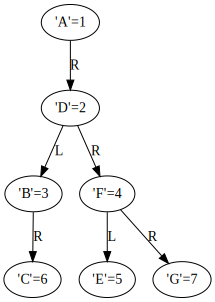

In [10]:
class Node:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        
        self.left = None
        self.right = None
        
    def name(self):
        return repr(self.key) + "=" + repr(self.val)
    
    def to_graphviz(self, g=None):
        if g == None:
            g = Digraph()

        # draw self
        for label, child in [("L", self.left), ("R", self.right)]:
            if child != None:
                child.to_graphviz(g)
                g.edge(self.name(), child.name(), label=label)
        return g
    
    def _repr_svg_(self):
        return self.to_graphviz()._repr_svg_()
    
    def add(self, key, val):
        if self.key == key:
            self.val = val
        elif key < self.key:
            if self.left != None:
                self.left.add(key, val)
            else:
                self.left = Node(key, val)
        else:
            if self.right != None:
                self.right.add(key, val)
            else:
                self.right = Node(key, val)

    def __getitem__(self, target):
        if target < self.key and self.left != None:
            return self.left[target]
        elif target > self.key and self.right != None:
            return self.right[target]
        assert self.key == target
        return self.val
    
    def __setitem__(self, target, val):
        self.add(target, val)

tree = Node("A", 1)
tree.add("D", 2)
tree.add("B", 3)
tree.add("F", 4)
tree.add("E", 5)
tree.add("C", 6)
tree.add("G", 7)
tree

In [11]:
tree["A"], tree["C"], tree["G"]

(1, 6, 7)

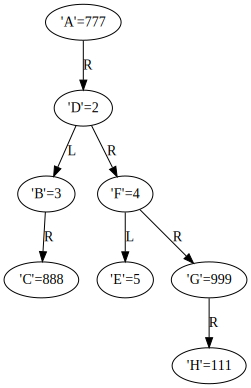

In [12]:
tree["A"] = 777
tree["C"] = 888
tree["G"] = 999
tree["H"] = 111
tree

In [13]:
tree["A"], tree["C"], tree["G"], tree["H"]

(777, 888, 999, 111)

## Graph Search

Checking whether a tree has a value is an example of a search problem.

What if we want to search a graph for a particular value?

We can force a loop with our Node objects.

In [15]:
A = Node("A", 1)
B = Node("B", 2)
A.right = B
B.left = A

In [21]:
def search(node, key):
    if node.key == key:
        return True
    for child in [node.left, node.right]:
        if child != None and search(child, key):
            return True
    return False

# does it work?
search(A, "B")

True

It worked there, but we're going to have a problem if we look for something we can't find.  Searching A will make us search B.  Searching B will make us search A.

This will cause infinite recusion:

In [24]:
try:
    search(A, "Z")
except RecursionError:
    print("I warned you!")

I warned you!
